In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from FactorAnalyzer import FactorAnalyzer

### Let's first generate some synthetic data

In [17]:
dist = stats.norm

n = 10**7
k = 2
p = 7

Z = dist.rvs(size=n*k).reshape(-1,2)

L = np.zeros((p,k))
v = np.linspace(0,10,p)

L[:,0] = v
L[:,1] = v[::-1]
    
Nu = dist.rvs(size=n * p).reshape(-1,p)
Psi_diag = np.ones(p) * .002
Nu = Nu * Psi_diag

X = (L @ Z.T).T + Nu

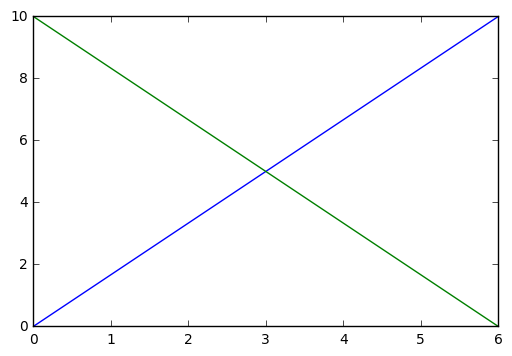

In [18]:
L0, L1 = L.T
plt.plot(L0)
plt.plot(L1)

### Fitting data to generative model

$$\mathbf{x} = \mathbf{\Lambda{z}}+\mathbf{u}$$

In [19]:
model = FactorAnalyzer(n_factors=2)
Lp, Pp = model.fit(X, verbose=True)

cycle 1, log-likelihood -4.022680570514894e+19
cycle 2, log-likelihood -4.022677754639362e+19
cycle 3, log-likelihood -4.022677754639362e+19
cycle 4, log-likelihood -4.022677754639362e+19
cycle 5, log-likelihood -4.022677754639362e+19
cycle 6, log-likelihood -4.022677754639362e+19
cycle 7, log-likelihood -4.022677754639362e+19
cycle 8, log-likelihood -4.0226777546392895e+19
cycle 9, log-likelihood -4.022677754637761e+19
cycle 10, log-likelihood -4.0226777545971016e+19
cycle 11, log-likelihood -4.022677753503979e+19
cycle 12, log-likelihood -4.0226777241267315e+19
cycle 13, log-likelihood -4.02267693461597e+19
cycle 14, log-likelihood -4.0226557166668595e+19
cycle 15, log-likelihood -4.022085541443818e+19
cycle 16, log-likelihood -4.006801859964778e+19
cycle 17, log-likelihood -3.623191373712531e+19
cycle 18, log-likelihood -5.486751743585861e+18
cycle 19, log-likelihood -3.409570655437062e+16
cycle 20, log-likelihood -2139334346931850.5
cycle 21, log-likelihood -586409914674557.8
cycle

### Plotting factor loading matrix elements for each latent variable

([<matplotlib.lines.Line2D at 0x7f29d2b215f8>],
 [<matplotlib.lines.Line2D at 0x7f29d2ae9e48>])

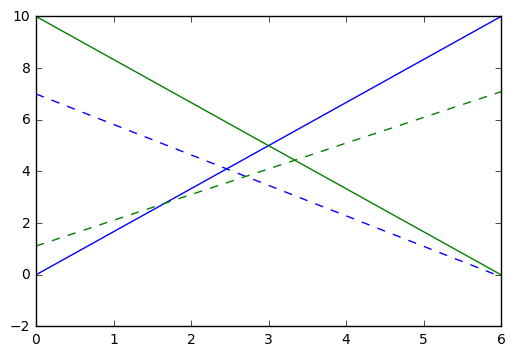

In [20]:
Lp0, Lp1 = Lp.T
plt.plot(L0, 'b'), plt.plot(Lp0, 'b--')
plt.plot(L1, 'g'), plt.plot(Lp1, 'g--')

In [16]:
print("Noise Variances:\n", np.diag(Pp))

Noise Variances:
 [ 0.31404024  0.16590185  0.077017    0.04738554  0.07700964  0.16588722
  0.31401865]
